In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [19]:
df=pd.read_excel('Data.xlsx')

In [20]:
df.drop(df.columns[[0, 1,-1,-2,-3,-4,-5,-6,-7,-8,-9,-10,-11,-12]],inplace=True,axis=1)

In [21]:
#Suppression de toutes nos features contenant des valeurs nulles.
df.dropna(axis=1, inplace=True)
df.head()

,sex,group,breed_size,Breed,Litter_size,Dead,Diarr_1m,Diarr_2m,weight_D1,IgG_dam,age_dam
0,M,EL,S,Poodle,1,1,0,0,223,8.412161,6
1,M,OO,S,Lhasa Apso,6,0,1,0,167,6.001322,3
2,F,OL,S,Lhasa Apso,6,0,1,0,165,6.001322,3
3,F,OO,S,Lhasa Apso,6,1,0,0,182,6.001322,3
4,F,OL,S,Lhasa Apso,6,1,0,0,178,6.001322,3


In [22]:
first_column = df.pop('Dead') 
df.insert(0, 'Dead', first_column) 
df.head()

,Dead,sex,group,breed_size,Breed,Litter_size,Diarr_1m,Diarr_2m,weight_D1,IgG_dam,age_dam
0,1,M,EL,S,Poodle,1,0,0,223,8.412161,6
1,0,M,OO,S,Lhasa Apso,6,1,0,167,6.001322,3
2,0,F,OL,S,Lhasa Apso,6,1,0,165,6.001322,3
3,1,F,OO,S,Lhasa Apso,6,0,0,182,6.001322,3
4,1,F,OL,S,Lhasa Apso,6,0,0,178,6.001322,3


In [23]:
df['sex']=pd.Categorical(df['sex'],ordered=False)
df['group']=pd.Categorical(df['group'],ordered=False)
df['breed_size']=pd.Categorical(df['breed_size'],ordered=False)
df['Breed']=pd.Categorical(df['Breed'],ordered=False)

In [24]:
#Labélisation de nos données catégorielles en utilisant la méthode LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['group'] = label_encoder.fit_transform(df['group'])
df['Breed'] = label_encoder.fit_transform(df['Breed'])
df['breed_size'] = label_encoder.fit_transform(df['breed_size'])

df['sex'] = df['sex'].replace(to_replace={'M':1,'F':0})

In [25]:
X = df.drop('Dead', axis=1)

n = X.shape[0]
p = X.shape[1]
sc = StandardScaler()
Z = sc.fit_transform(X)
acp = PCA(svd_solver='full')
coord = acp.fit_transform(Z)
#valeur corrigée
eigval = (n-1)/n*acp.explained_variance_
print('Valeurs propres : \n', eigval)
# proportion de variance expliquée
print('Proportion de variance : \n', acp.explained_variance_ratio_)

Valeurs propres : 
 [2.37322277 1.69221367 1.24798994 1.04539262 0.95322505 0.86244558
 0.6671782  0.543512   0.45459651 0.16022366]
Proportion de variance : 
 [0.23732228 0.16922137 0.12479899 0.10453926 0.0953225  0.08624456
 0.06671782 0.0543512  0.04545965 0.01602237]


In [26]:
print(acp.explained_variance_)
print(acp.explained_variance_ratio_)

[2.38734909 1.70228637 1.25541845 1.0516152  0.95889901 0.86757919
 0.6711495  0.54674719 0.45730244 0.16117737]
[0.23732228 0.16922137 0.12479899 0.10453926 0.0953225  0.08624456
 0.06671782 0.0543512  0.04545965 0.01602237]


In [27]:
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(10)], 
        "Variance expliquée" : acp.explained_variance_,
        "% variance expliquée" : np.round(acp.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(acp.explained_variance_ratio_) * 100)
    }
)
eig

,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,2.387349,24.0,24.0
1,Dim2,1.702286,17.0,41.0
2,Dim3,1.255418,12.0,53.0
3,Dim4,1.051615,10.0,64.0
4,Dim5,0.958899,10.0,73.0
5,Dim6,0.867579,9.0,82.0
6,Dim7,0.671149,7.0,88.0
7,Dim8,0.546747,5.0,94.0
8,Dim9,0.457302,5.0,98.0
9,Dim10,0.161177,2.0,100.0


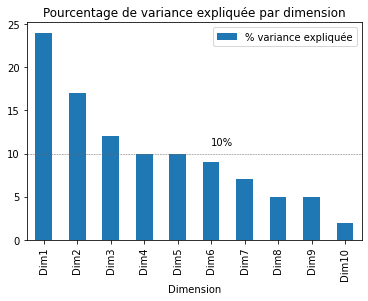

In [28]:
eig.plot.bar(x = "Dimension", y = "% variance expliquée") # permet un diagramme en barres
plt.text(5, 11, "10%") # ajout de texte
plt.axhline(y = 10, linewidth = .5, color = "dimgray", linestyle = "--") 
plt.title("Pourcentage de variance expliquée par dimension")
plt.show()

In [29]:
# Transformation en DataFrame pandas
pca_df = pd.DataFrame({
    "Dim1" : coord[:,0], 
    "Dim2" : coord[:,1],
    "Dim3" : coord[:,2],
    "Dim4" : coord[:,3]
})

# Résultat (premières lignes)
pca_df.head()

,Dim1,Dim2,Dim3,Dim4
0,-1.158247,-1.732373,0.271511,-1.194195
1,-0.867437,1.720925,-1.486062,-0.513442
2,-0.558520,1.946060,-1.300781,0.601246
3,-1.027741,0.865669,-0.934039,0.931362
4,-0.910039,0.750042,-0.478610,0.608135


C:\Users\Julia Vilas\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


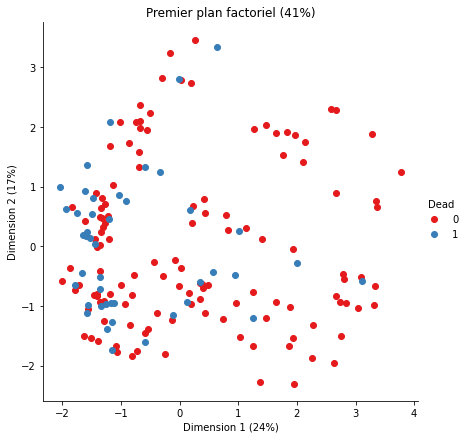

In [30]:
x = df.iloc[:,1:10].values
y = df.iloc[:,0].values

x_df = pd.DataFrame(x,columns=df.columns[1:10])
y_df = pd.DataFrame(y, columns=['Dead'])

pca = PCA(n_components=4).fit_transform(Z) # pca output is an array
pca_df = pd.DataFrame(pca,columns=['pca_1','pca_2','pca_3','pca_4']) # transforming back to df
pca_Y = pd.concat([pca_df, y_df],axis=1)

import matplotlib.pyplot as plt
import seaborn as sns
sns.FacetGrid(pca_Y, hue="Dead", palette="Set1", size=6).map(plt.scatter, "pca_1", "pca_2").add_legend()
plt.xlabel("Dimension 1 (24%)")
plt.ylabel("Dimension 2 (17%)")
plt.title("Premier plan factoriel (41%)")
plt.show()

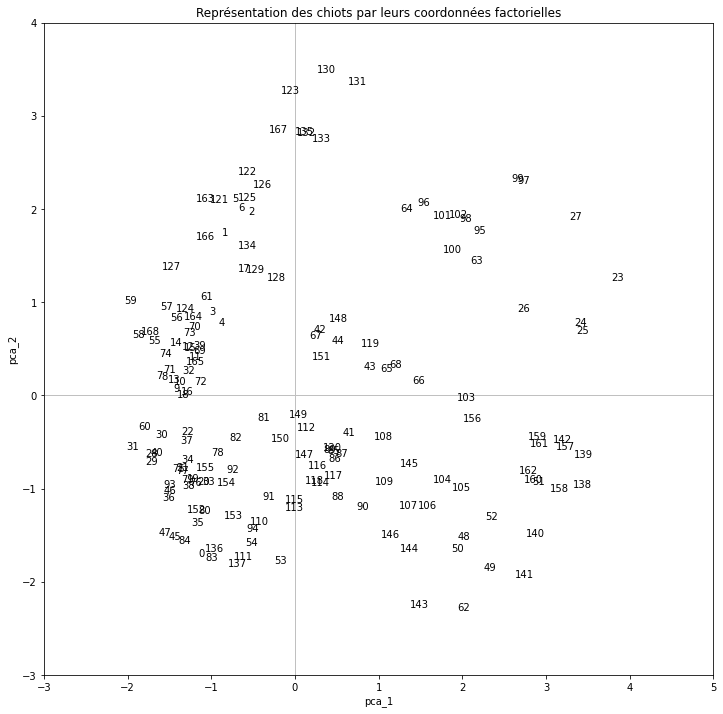

In [31]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-3,5) #même limites en abscisse
axes.set_ylim(-3,4) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
    plt.annotate(X.index[i],(pca[i,0],pca[i,1]))
#ajouter les axes
plt.plot([-3,5],[0,0],color='silver',linestyle='-',linewidth=1)
plt.xlabel("pca_1")
plt.ylabel("pca_2")
plt.plot([0,0],[-3,4],color='silver',linestyle='-',linewidth=1)
#affichage
plt.title("Représentation des chiots par leurs coordonnées factorielles")
plt.show()

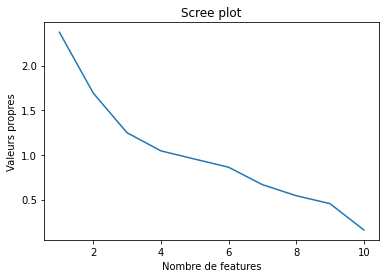

In [32]:
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Valeurs propres")
plt.xlabel("Nombre de features")
plt.show()

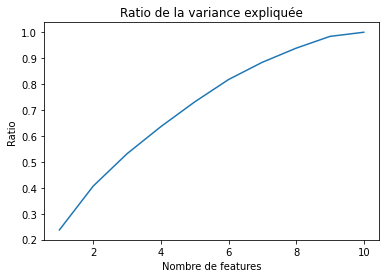

In [33]:
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Ratio de la variance expliquée")
plt.ylabel("Ratio")
plt.xlabel("Nombre de features")
plt.show()

In [34]:
# seuils pour test des bâtons brisés
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

   Val.Propre    Seuils
0    2.373223  2.928968
1    1.692214  1.928968
2    1.247990  1.428968
3    1.045393  1.095635
4    0.953225  0.845635
5    0.862446  0.645635
6    0.667178  0.478968
7    0.543512  0.336111
8    0.454597  0.211111
9    0.160224  0.100000


In [35]:
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

#corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]
#afficher la matrice des corrélations variables x facteurs
print(corvar)
# Les variables sont  en ligne, les facteurs en colonne :

[[-0.13966371 -0.22366125  0.14987913 -0.73577741 -0.33965704 -0.48116701
  -0.01312515  0.13498074  0.03644128  0.00537699]
 [-0.23583948  0.17711905 -0.5629017   0.37287819 -0.05635285 -0.61187423
  -0.25873422 -0.0827625  -0.06123437 -0.04476299]
 [-0.86816897  0.06449115  0.06231117 -0.01351062  0.24024705  0.09130711
  -0.02623529  0.30357438  0.11998643 -0.25448033]
 [-0.70675454  0.2573015   0.16527866 -0.11551336 -0.05259696 -0.03235478
   0.32351617 -0.47938166 -0.22984974 -0.0501988 ]
 [ 0.13461516  0.48870003  0.5743209   0.15999357 -0.41591818  0.06675614
  -0.38264489  0.07444919 -0.2317835  -0.06693947]
 [ 0.25927321  0.61930449 -0.37720435 -0.00815047 -0.2631648   0.02814789
   0.45888989  0.32260049 -0.14774915 -0.01899911]
 [ 0.29461719  0.42299324  0.057379   -0.34080254  0.70759079 -0.14721074
  -0.13062782  0.0578231  -0.26694733  0.02854764]
 [ 0.88537718 -0.24819762 -0.11140243 -0.11772688 -0.0208388  -0.00847737
   0.04362152 -0.20001422 -0.02506209 -0.29187723]


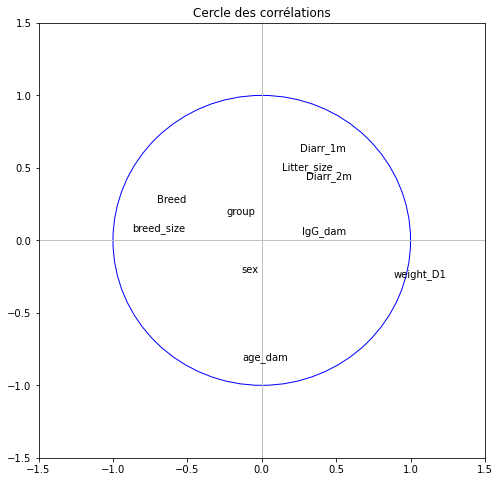

In [36]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1.5,1.5)
axes.set_ylim(-1.5,1.5)
#affichage des étiquettes (noms des variables)
for j in range(p):
    plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))
#ajouter les axes
plt.plot([-1.5,1.5],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1.5,1.5],color='silver',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.title("Cercle des corrélations")
plt.show()

In [37]:
di = np.sum(Z**2,axis=1)
print(pd.DataFrame({'ID':X.index,'d_i':di}))

      ID        d_i
0      0  10.901669
1      1   9.380376
2      2   7.977025
3      3   5.756386
4      4   4.252240
..   ...        ...
164  164   7.739700
165  165   9.258533
166  166  11.285657
167  167  18.938989
168  168   7.824878

[169 rows x 2 columns]


In [38]:
cos2 = coord**2
for j in range(p):
 cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':X.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

      id    COS2_1    COS2_2
0      0  0.123058  0.275290
1      1  0.080215  0.315721
2      2  0.039105  0.474757
3      3  0.183492  0.130183
4      4  0.194761  0.132298
..   ...       ...       ...
164  164  0.226063  0.085332
165  165  0.184763  0.011547
166  166  0.123812  0.248438
167  167  0.004933  0.421270
168  168  0.431641  0.054992

[169 rows x 3 columns]


In [39]:
ctr = coord**2
for j in range(p):
 ctr[:,j] = ctr[:,j]/(n*eigval[j])
 
print(pd.DataFrame({'id':X.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

      id     CTR_1     CTR_2
0      0  0.003345  0.010494
1      1  0.001876  0.010356
2      2  0.000778  0.013243
3      3  0.002634  0.002620
4      4  0.002065  0.001967
..   ...       ...       ...
164  164  0.004362  0.002309
165  165  0.004265  0.000374
166  166  0.003484  0.009804
167  167  0.000233  0.027898
168  168  0.008421  0.001505

[169 rows x 3 columns]
